## Capitulo 8: Introducción a las Redes Neuronales

### Clasificacion de imagenes del dataset MNIST

11501568/11490434 [==============================] - 0s 0us/step
Shape of x_train:  (60000, 28, 28)
Training images:  60000
Test images:  10000
Image height:  28
Image width:  28
-----------------------------


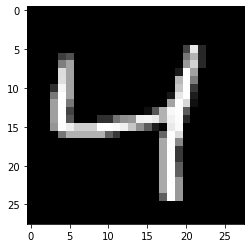

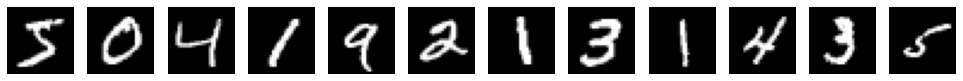

In [ ]:
# Importamos librerias necesarias
import numpy as np
import pandas as pd

from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_train_images = x_train.shape[0]
num_test_images = x_test.shape[0]
image_height = x_train.shape[1]
image_width = x_train.shape[2]

print("Shape of x_train: ", x_train.shape)
print("Training images: ", num_train_images)
print("Test images: ", num_test_images)
print("Image height: ", image_height)
print("Image width: ", image_width)
print("-----------------------------")

plt.imshow(x_train[2], cmap='gray');

fig, ax = plt.subplots(1, 12, figsize=(17, 6))
for i in range(12):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].axis('off')

In [ ]:
from keras.utils import np_utils

x_train = x_train.reshape(num_train_images, image_height*image_width).astype('float32')
x_test = x_test.reshape(num_test_images, image_height*image_width).astype('float32')

print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("-----------------------------")
print("y_train sample: ", y_train[:12])
print("-----------------------------")
x_train = x_train / 255
x_test = x_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("-----------------------------")
print("y_train sample: ", y_test[0])

num_classes = y_test.shape[1]
print("Number of classes: ", num_classes)

X_train shape:  (60000, 784)
X_test shape:  (10000, 784)
y_train shape:  (60000,)
y_test shape:  (10000,)
-----------------------------
y_train sample:  [5 0 4 1 9 2 1 3 1 4 3 5]
-----------------------------
y_train shape:  (60000, 10)
y_test shape:  (10000, 10)
-----------------------------
y_train sample:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Number of classes:  10


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(500, input_dim=image_height*image_width, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=256, verbose=2)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 500)               392500    
                                                                 
 dense_21 (Dense)            (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
235/235 - 2s - loss: 0.3248 - accuracy: 0.9089 - val_loss: 0.1757 - val_accuracy: 0.9468 - 2s/epoch - 7ms/step
Epoch 2/50
235/235 - 1s - loss: 0.1380 - accuracy: 0.9609 - val_loss: 0.1131 - val_accuracy: 0.9668 - 1s/epoch - 5ms/step
Epoch 3/50
235/235 - 1s - loss: 0.0920 - accuracy: 0.9740 - val_loss: 0.0908 - val_accuracy: 0.9721 - 1s/epoch - 5ms/step
Epoch 4/50
235/235 - 1s - loss: 0.0664 - accuracy: 0.9811 - val_loss: 0.0781 -

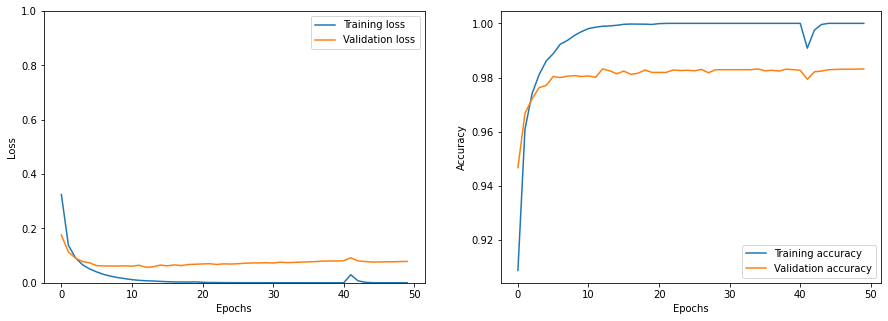

In [ ]:
import numpy as np

def plot(history):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(history.history['loss'], label='Training loss')
    ax[0].plot(history.history['val_loss'], label='Validation loss')
    ax[0].legend()
    ax[1].plot(history.history['accuracy'], label='Training accuracy')
    ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
    
    ax[1].legend()
    
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    
    # Para visualizar mejor el loss respecto al cero
    ax[0].set_ylim(0, 1)
    
    
plot(history)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                39250     
                                                                 
 dense_25 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
235/235 - 1s - loss: 0.5722 - accuracy: 0.8417 - val_loss: 0.2836 - val_accuracy: 0.9206 - 890ms/epoch - 4ms/step
Epoch 2/50
235/235 - 0s - loss: 0.2537 - accuracy: 0.9290 - val_loss: 0.2180 - val_accuracy: 0.9380 - 442ms/epoch - 2ms/step
Epoch 3/50
235/235 - 0s - loss: 0.2043 - accuracy: 0.9429 - val_loss: 0.1848 - val_accuracy: 0.9461 - 430ms/epoch - 2ms/step
Epoch 4/50
235/235 - 0s - loss: 0.1747 - accuracy: 0.9507 - val_loss: 

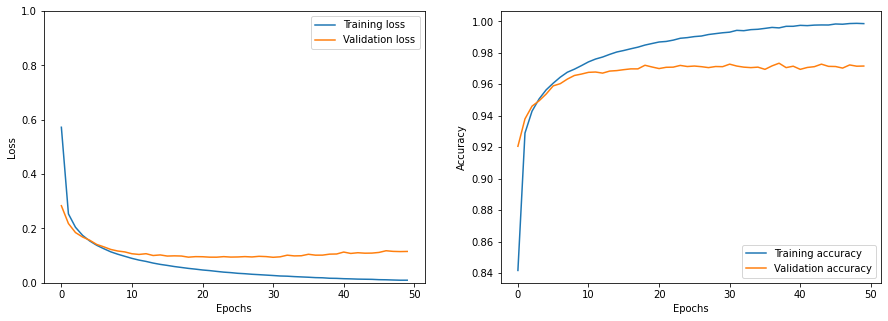

In [ ]:
## Segundo modelo, intentados evitar overfitting

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim=image_height*image_width, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=256, verbose=2)

plot(history)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                39250     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
235/235 - 1s - loss: 0.7091 - accuracy: 0.7890 - val_loss: 0.3066 - val_accuracy: 0.9174 - 1s/epoch - 4ms/step
Epoch 2/50
235/235 - 1s - loss: 0.3663 - accuracy: 0.8948 - val_loss: 0.2407 - val_accuracy: 0.9314 - 524ms/epoch - 2ms/step
Epoch 3/50
235/235 - 1s - loss: 0.3078 - accuracy: 0.9107 - val_los

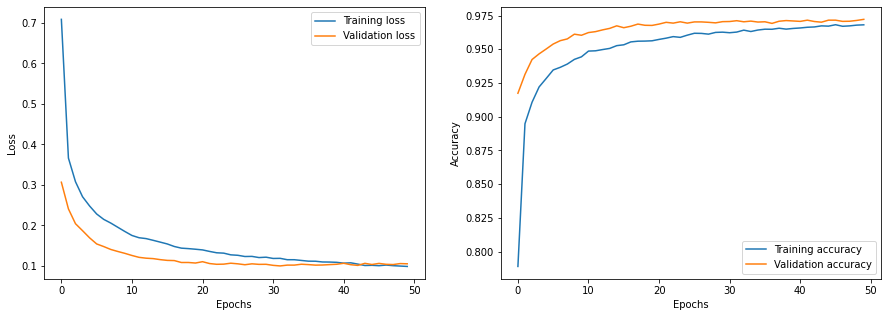

In [ ]:
## Tercer modelo, intentados evitar overfitting añadiendo capas Dropout

from statistics import mode
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Dense(50, input_dim=image_height*image_width, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=256, verbose=2)

plot(history)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 20)                2020      
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
Total params: 80,730
Trainable params: 80,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
235/235 - 1s - loss: 0.7635 - accuracy:

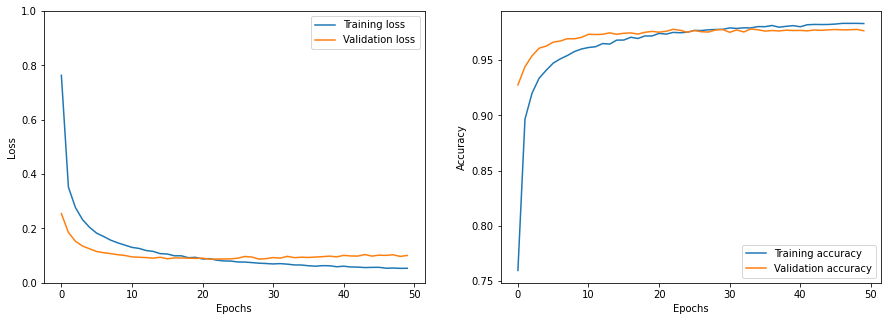

In [ ]:
## Cuarto modelo, intentados meter mas capas y una capa Dropout mas agresiva de 0.4

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim=image_height*image_width, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=256, verbose=2)

plot(history)

### Clasificacion de imagenes del dataset FASHION MNIST

Shape of x_train:  (60000, 28, 28)
Training images:  60000
Test images:  10000
Image height:  28
Image width:  28
-----------------------------


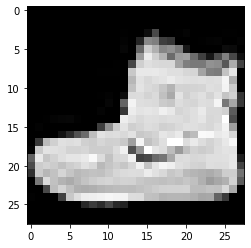

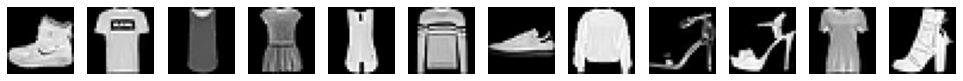

In [ ]:
# Importamos librerias necesarias
import numpy as np
import pandas as pd

from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

num_train_images = x_train.shape[0]
num_test_images = x_test.shape[0]
image_height = x_train.shape[1]
image_width = x_train.shape[2]

print("Shape of x_train: ", x_train.shape)
print("Training images: ", num_train_images)
print("Test images: ", num_test_images)
print("Image height: ", image_height)
print("Image width: ", image_width)
print("-----------------------------")

plt.imshow(x_train[0], cmap='gray');

fig, ax = plt.subplots(1, 12, figsize=(17, 6))
for i in range(12):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].axis('off')

In [ ]:
import keras.utils as np_utils

x_train = x_train.reshape(num_train_images, image_height*image_width).astype('float32')
x_test = x_test.reshape(num_test_images, image_height*image_width).astype('float32')

print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("-----------------------------")
print("y_train sample: ", y_train[:12])
print("-----------------------------")
x_train = x_train / 255
x_test = x_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print("y_train shape: ", y_train.shape)
print("-----------------------------")
print("y_train sample: ", y_test[0])
print("y_train sample: ", y_test[1])

num_classes = y_test.shape[1]
print("Number of classes: ", num_classes)

X_train shape:  (60000, 784)
X_test shape:  (10000, 784)
y_train shape:  (60000,)
y_test shape:  (10000,)
-----------------------------
y_train sample:  [9 0 0 3 0 2 7 2 5 5 0 9]
-----------------------------
y_train shape:  (60000, 10)
-----------------------------
y_train sample:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y_train sample:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Number of classes:  10


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 500)               392500    
                                                                 
 dense_27 (Dense)            (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
235/235 - 2s - loss: 0.5435 - accuracy: 0.8111 - val_loss: 0.4432 - val_accuracy: 0.8474 - 2s/epoch - 7ms/step
Epoch 2/50
235/235 - 1s - loss: 0.3898 - accuracy: 0.8630 - val_loss: 0.3957 - val_accuracy: 0.8613 - 1s/epoch - 5ms/step
Epoch 3/50
235/235 - 1s - loss: 0.3470 - accuracy: 0.8752 - val_loss: 0.3875 - val_accuracy: 0.8628 - 1s/epoch - 5ms/step
Epoch 4/50
235/235 - 1s - loss: 0.3227 - accuracy: 0.8843 - val_loss: 0.3612 

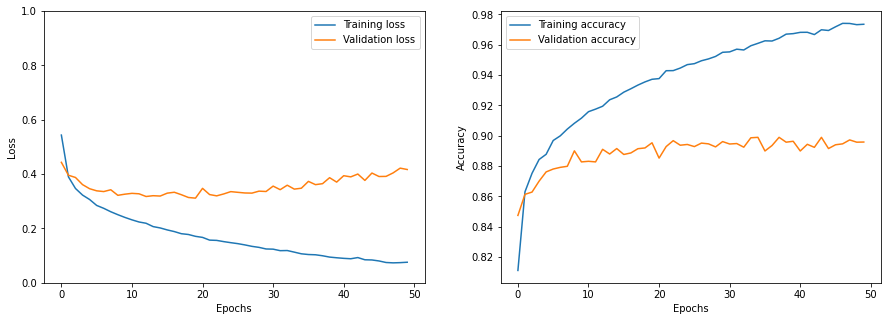

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(500, input_dim=image_height*image_width, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=256, verbose=2)

plot(history)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 50)                39250     
                                                                 
 dense_37 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
118/118 - 1s - loss: 0.8500 - accuracy: 0.7251 - val_loss: 0.5774 - val_accuracy: 0.8004 - 801ms/epoch - 7ms/step
Epoch 2/50
118/118 - 0s - loss: 0.5036 - accuracy: 0.8324 - val_loss: 0.5322 - val_accuracy: 0.8129 - 432ms/epoch - 4ms/step
Epoch 3/50
118/118 - 0s - loss: 0.4564 - accuracy: 0.8436 - val_loss: 0.4699 - val_accuracy: 0.8387 - 465ms/epoch - 4ms/step
Epoch 4/50
118/118 - 0s - loss: 0.4261 - accuracy: 0.8537 - val_loss: 

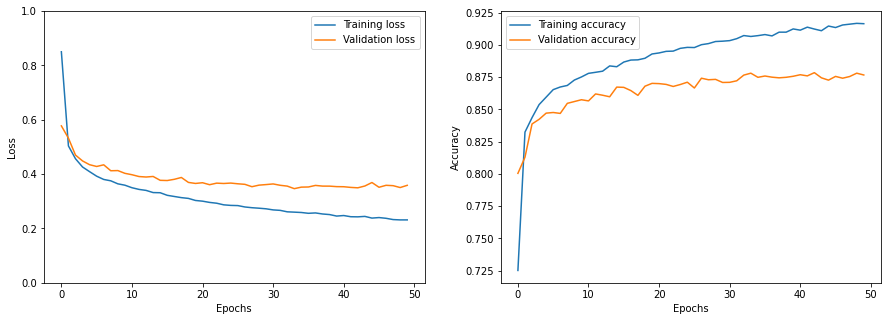

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim=image_height*image_width, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=512, verbose=2)

plot(history)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 50)                39250     
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_42 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
118/118 - 1s - loss: 1.1809 - accuracy: 0.6004 - val_loss: 0.6671 - val_accuracy: 0.7691 - 983ms/epoch - 8ms/step
Epoch 2/50
118/118 - 1s - loss: 0.7094 - accuracy: 0.7594 - val_loss: 0.5498 - val_accuracy: 0.8119 - 535ms/epoch - 5ms/step
Epoch 3/50
118/118 - 0s - loss: 0.6096 - accuracy: 0.7919 - val

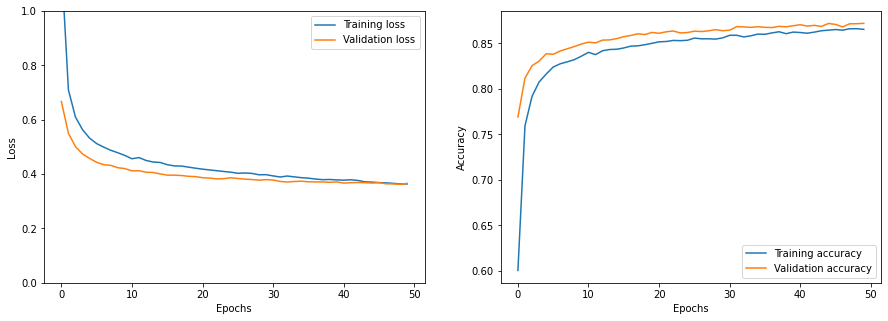

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Dense(50, input_dim=image_height*image_width, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=512, verbose=2)

plot(history)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 100)               78500     
                                                                 
 dense_44 (Dense)            (None, 20)                2020      
                                                                 
 dropout_10 (Dropout)        (None, 20)                0         
                                                                 
 dense_45 (Dense)            (None, 10)                210       
                                                                 
Total params: 80,730
Trainable params: 80,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
235/235 - 1s - loss: 1.0807 - accuracy: 0.6310 - val_loss: 0.5484 - val_accuracy: 0.8180 - 1s/epoch - 5ms/step
Epoch 2/50
235/235 - 1s - loss: 0.6924 - accuracy: 0.7599 -

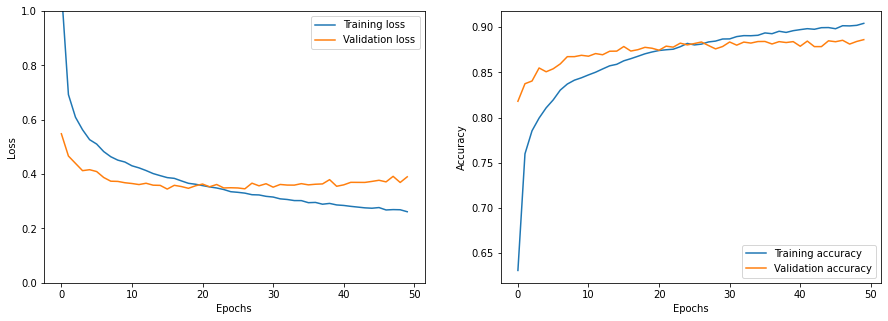

In [ ]:
## Cuarto modelo, intentados meter mas capas y una capa Dropout mas agresiva de 0.4

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim=image_height*image_width, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=256, verbose=2)

plot(history)

### Clasificacion de imagenes del dataset CIFAR100

169017344/169001437 [==============================] - 4s 0us/step
Shape of x_train:  (50000, 32, 32, 3)
Training images:  50000
Test images:  10000
Image height:  32
Image width:  32
-----------------------------


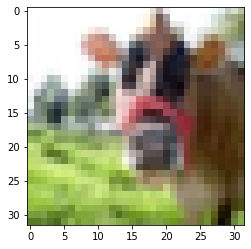

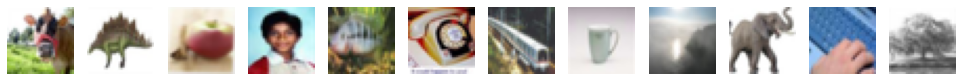

In [2]:
# Importamos librerias necesarias
import numpy as np
import pandas as pd

from keras.datasets import cifar100
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

num_train_images = x_train.shape[0]
num_test_images = x_test.shape[0]
image_height = x_train.shape[1]
image_width = x_train.shape[2]

print("Shape of x_train: ", x_train.shape)
print("Training images: ", num_train_images)
print("Test images: ", num_test_images)
print("Image height: ", image_height)
print("Image width: ", image_width)
print("-----------------------------")

plt.imshow(x_train[0], cmap='gray');

fig, ax = plt.subplots(1, 12, figsize=(17, 6))
for i in range(12):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].axis('off')

In [4]:
from keras.utils import np_utils

# A diferencia de los demas, tenemos que tener en cuenta la profundidad de color = 3
x_train = x_train.reshape(num_train_images, image_height*image_width*3).astype('float32')
x_test = x_test.reshape(num_test_images, image_height*image_width*3).astype('float32')

print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("-----------------------------")
x_train = x_train / 255
x_test = x_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("-----------------------------")
print("y_train sample: ", y_test[0])

num_classes = y_test.shape[1]
print("Number of classes: ", num_classes)

X_train shape:  (50000, 3072)
X_test shape:  (10000, 3072)
y_train shape:  (50000, 1)
y_test shape:  (10000, 1)
-----------------------------
y_train shape:  (50000, 100)
y_test shape:  (10000, 100)
-----------------------------
y_train sample:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Number of classes:  100


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               1536500   
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               50100     
                                                                 
Total params: 1,586,600
Trainable params: 1,586,600
Non-trainable params: 0
_________________________________________________________________


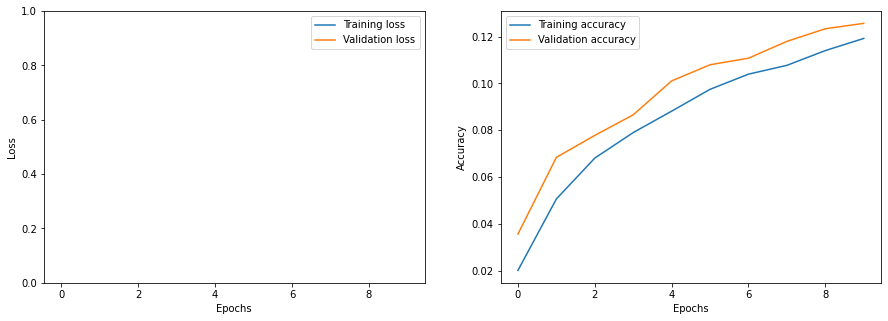

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(1000, input_dim=image_height*image_width*3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10, batch_size=512, verbose=0)

plot(history)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(1000, input_dim=image_height*image_width*3, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=256, verbose=0)

plot(history)